# Image Rotation

Interpolation is a basic tool used extensively in tasks such as zooming, shrinking,
rotating, and geometric corrections.<br>
Rotation is one of affine transformations.

In [1]:
import numpy as np
from scipy.misc import imread
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, imshow, axis
from decimal import Decimal

### Show image
Parameteres <i>vmin</i> and <i>vmax</i> are set to limit pixel value so that the pixels with no values after rotation are obvious

In [2]:
vmin = 127 # min pixel intensity
vmax = 255 # max pixel intensity
def show_image(image, title, cmap=None):
    plt.figure(figsize=(4,4))
    plt.imshow(image, cmap=cmap, vmin=0, vmax=vmax)
    plt.title(title)
    plt.axis('off')
    plt.show()

### Show images horizontally
For easier comparison of rotated images

In [3]:
def show_image_horizontaly(list_image, list_title, cmap=None):
    list_len = len(list_image)
    fig = figure(figsize=(3*list_len, 3*list_len))
    n_image = len(list_image)
    for i in range(n_image):
        a=fig.add_subplot(1,n_image,i+1)
        plt.title(list_title[i], fontsize=20)
        image = list_image[i]
        imshow(image,cmap=cmap, vmin=0, vmax=vmax)
        axis('off')

## Rotate image for value of theta

### Formula for rotation
Rotation by $\theta$:
$$\begin{eqnarray}
x’=cos \theta x - sin \theta y \cr
y’=sin \theta x + cos \theta y
\end{eqnarray}$$

Where $\theta$ (Theta) is a value in degrees.

#### Rotate image

In [4]:
def rotate_image(image, theta):
    theta = theta
    x_len = image.shape[0]
    y_len = image.shape[1]
    # create cartesian product of number of rows and number of columns
    matrix_loc = np.array([index for index, x in np.ndenumerate(image)]) 

    rot_image = np.zeros(image.shape) # initialize rotated image matrix

    for m in matrix_loc: # loop through every coordinate
        m_x = m[0]
        m_y = m[1]
        x_ = np.round(np.cos(theta)*m_x - np.sin(theta)*m_y).astype(int)
        y_ = np.round(np.sin(theta)*m_x + np.cos(theta)*m_y).astype(int)
        if (0 <= x_ < x_len) and (0 <= y_ < y_len): # if the x' and y' are within the original image size
            rot_image[x_][y_] = image[m_x][m_y]
    return rot_image

#### Rotate one image for a list of Thetas
<b><i>Function has an early break! When less than 10% of original image is shown, it terminates</b></i>

In [5]:
def multi_rotate_image(image, list_theta, cmap=None):
    list_image = []
    list_title = []
    list_image.append(image) # append initial image
    list_title.append("Original") # append title for original image'
    image_sum = np.sum(image)
    for theta in list_theta: # loop through Thetas
        rot_image = rotate_image(image=image, theta=theta)
        rot_image_sum = np.sum(rot_image)
        if rot_image_sum < image_sum*0.1:
            break
        list_image.append(rot_image)
        list_title.append("Theta={}".format(round(theta, 1)))
        
    show_image_horizontaly(list_image=list_image, list_title=list_title, cmap=cmap)

## Example 1: Rotating randomly generated image

#### Generate random image

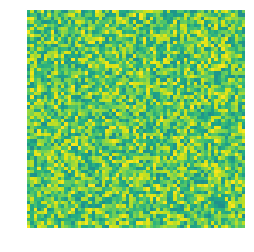

In [6]:
np.random.seed(1)
size = 64
image = np.random.randint(vmin, vmax, size=(size, size))
show_image(image, title="", cmap=None)

#### Rotate the image once

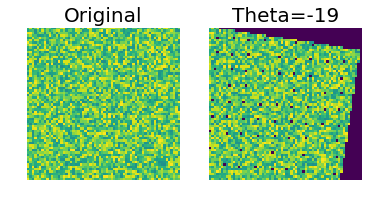

In [7]:
theta = -19
image=image
rot_image = rotate_image(image=image, theta=theta)

list_image = [image, rot_image]
list_title = ["Original", "Theta={}".format(theta)]
show_image_horizontaly(list_image=list_image, list_title=list_title)

#### Run multi rotation
Do not be a hero, use small Thetas and steps! :)

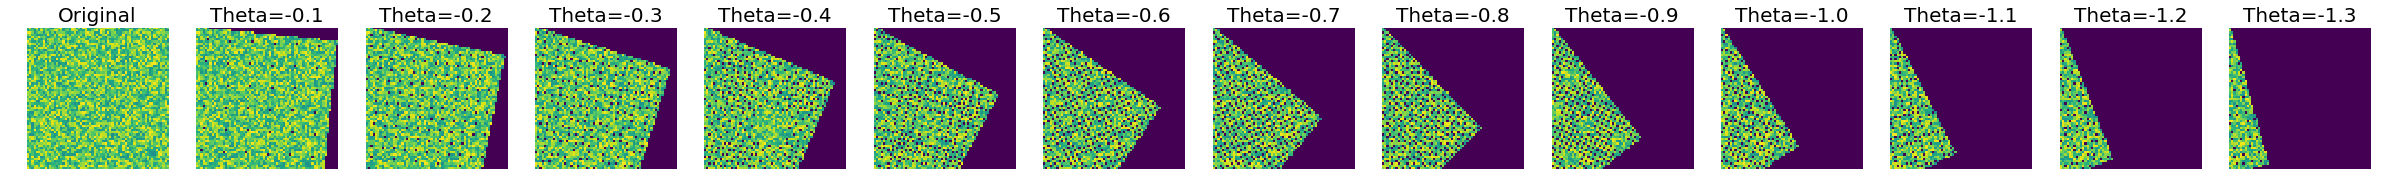

In [8]:
step = -0.1

list_theta = np.arange(start=-0.1, stop=-2, step=step)
multi_rotate_image(image=image, list_theta=list_theta)

## Example 2: Rotating image of Mona

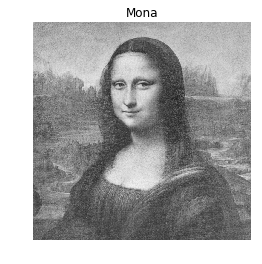

In [9]:
image_path_mona = "data/mona.png"
image_mona = imread(image_path_mona, flatten=True)
show_image(image=image_mona, title="Mona", cmap="gray")

#### Rotate Mona once

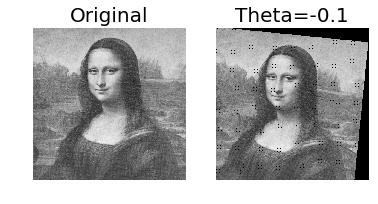

In [10]:
theta_mona = -0.1
rot_image_mona = rotate_image(image=image_mona, theta=theta_mona)

list_image_mona = [image_mona, rot_image_mona]
list_title_mona = ["Original", "Theta={}".format(theta_mona)]
show_image_horizontaly(list_image=list_image_mona, list_title=list_title_mona, cmap="gray")

#### Run multi rotation on Mona
Still no time to be a hero, use small Thetas and steps! :)

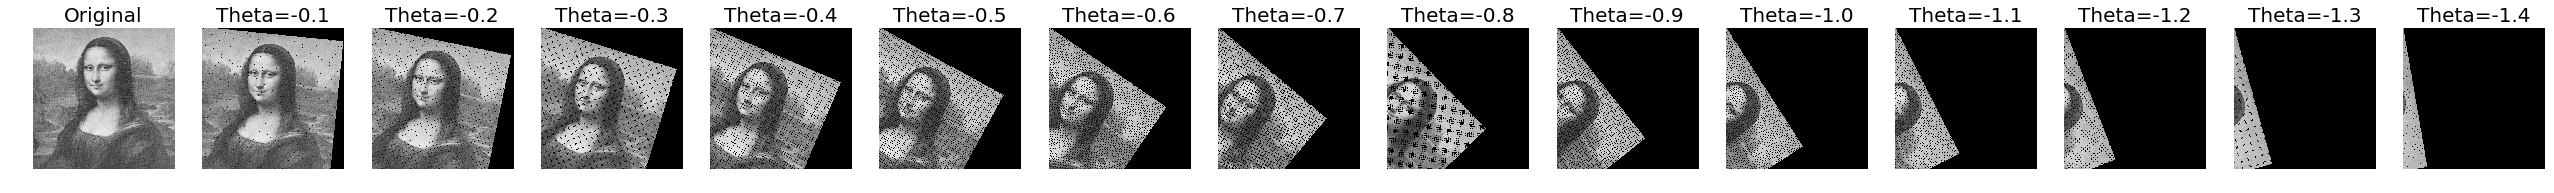

In [11]:
step = -0.1

list_theta_mona = np.arange(start=-0.1, stop=-2, step=step)
multi_rotate_image(image=image_mona, list_theta=list_theta_mona, cmap="gray")